In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py
import re
import dedalus.extras.plot_tools as pt
from scipy.ndimage import uniform_filter1d

In [68]:
curtis = np.loadtxt("eps_0.4_run/fig_kinetic_t.dat")

In [3]:
Lx = 25
Ly = 25
Lz = 1
nx = 64
ny = 64
nz = 16

# eps = 0.8
Nu_curtis = 1.5899808
KE_curtis = 23.5709210

# eps = 0.4
#Nu_curtis = 1.4002670
#KE_curtis = 12.5310550

# eps = 0.2
#Nu_curtis = 1.2217185 
#KE_curtis = 5.9535003 


KE_curtis_mod = KE_curtis*Lx*Ly*Lz



In [4]:
class IndexTracker:
    def __init__(self, ax, X, slice_axis=-2, vmin=None, vmax=None):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')
        self.slice_axis = slice_axis
        self.vmin = vmin
        self.vmax = vmax
        self.X = X
        self.slice_count = X.shape[self.slice_axis]
        self.ind = self.slice_count//2
        self.slice = [slice(None) for i in X.shape]
        self.slice[self.slice_axis] = self.ind

        self.im = ax.imshow(self.X[tuple(self.slice)])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slice_count
        else:
            self.ind = (self.ind - 1) % self.slice_count
        self.update()

    def update(self):
        self.slice[self.slice_axis] = self.ind
        data = self.X[tuple(self.slice)]
        self.im.set_data(data)
        if self.vmin:
            vmin = self.vmin
        else:
            vmin = data.min()
        if self.vmax:
            vmax = self.vmax
        else:
            vmax = data.max()
        self.im.set_clim(vmin=vmin, vmax=vmax)
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [79]:
#df = h5py.File("checkpoints/checkpoints_s20.h5","r")
#df = h5py.File("eps_0.4_run/snapshots/snapshots_s468.h5","r")
#df = h5py.File("eps_0.4_run_128_128_32/snapshots/snapshots_s202.h5","r")
#df = h5py.File("eps_0.4_run_bias_2_128_128_32/snapshots/snapshots_s19.h5","r")

#df = h5py.File("curtis_eps_0.4/snapshots/snapshots_s50.h5","r")

df = h5py.File("eps_0.4_run_MCNAB2_CFL_72_2/snapshots/snapshots_s15.h5","r")


In [187]:
ts_e8 = h5py.File("noise_ICs/scalar/scalar_s1/scalar_s1_p0.h5","r")
t_e8  = ts_e8['scales/sim_time'][:]
KE_e8 = ts_e8['tasks/KE'][:,0,0,0]/(Lx*Ly*Lz)
Re_e8 = ts_e8['tasks/Re_rms'][:,0,0,0]
Nu_e8 = ts_e8['tasks/Nusselt'][:,0,0,0]
ts.close()

In [6]:
ts = h5py.File("scalar/scalar_s1.h5","r")
t1  = ts['scales/sim_time'][:]
KE1 = ts['tasks/KE'][:,0,0,0]/(Lx*Ly*Lz)
Re1 = ts['tasks/Re_rms'][:,0,0,0]
Nu1 = ts['tasks/Nusselt'][:,0,0,0]
ts.close()

In [7]:
ts = h5py.File("scalar/scalar_s2/scalar_s2_p0.h5","r")
t  = ts['scales/sim_time'][:]
KE = ts['tasks/KE'][:,0,0,0]/(Lx*Ly*Lz)
Re = ts['tasks/Re_rms'][:,0,0,0]
Nu = ts['tasks/Nusselt'][:,0,0,0]
ts.close()

In [10]:
ts = h5py.File("scalar/scalar_s3/scalar_s3_p0.h5","r")
t2  = ts['scales/sim_time'][:]
KE2 = ts['tasks/KE'][:,0,0,0]/(Lx*Ly*Lz)
Re2 = ts['tasks/Re_rms'][:,0,0,0]
Nu2 = ts['tasks/Nusselt'][:,0,0,0]
ts.close()

In [8]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        print(cum_sum[i] / (i + 1))
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum

<IPython.core.display.Javascript object>


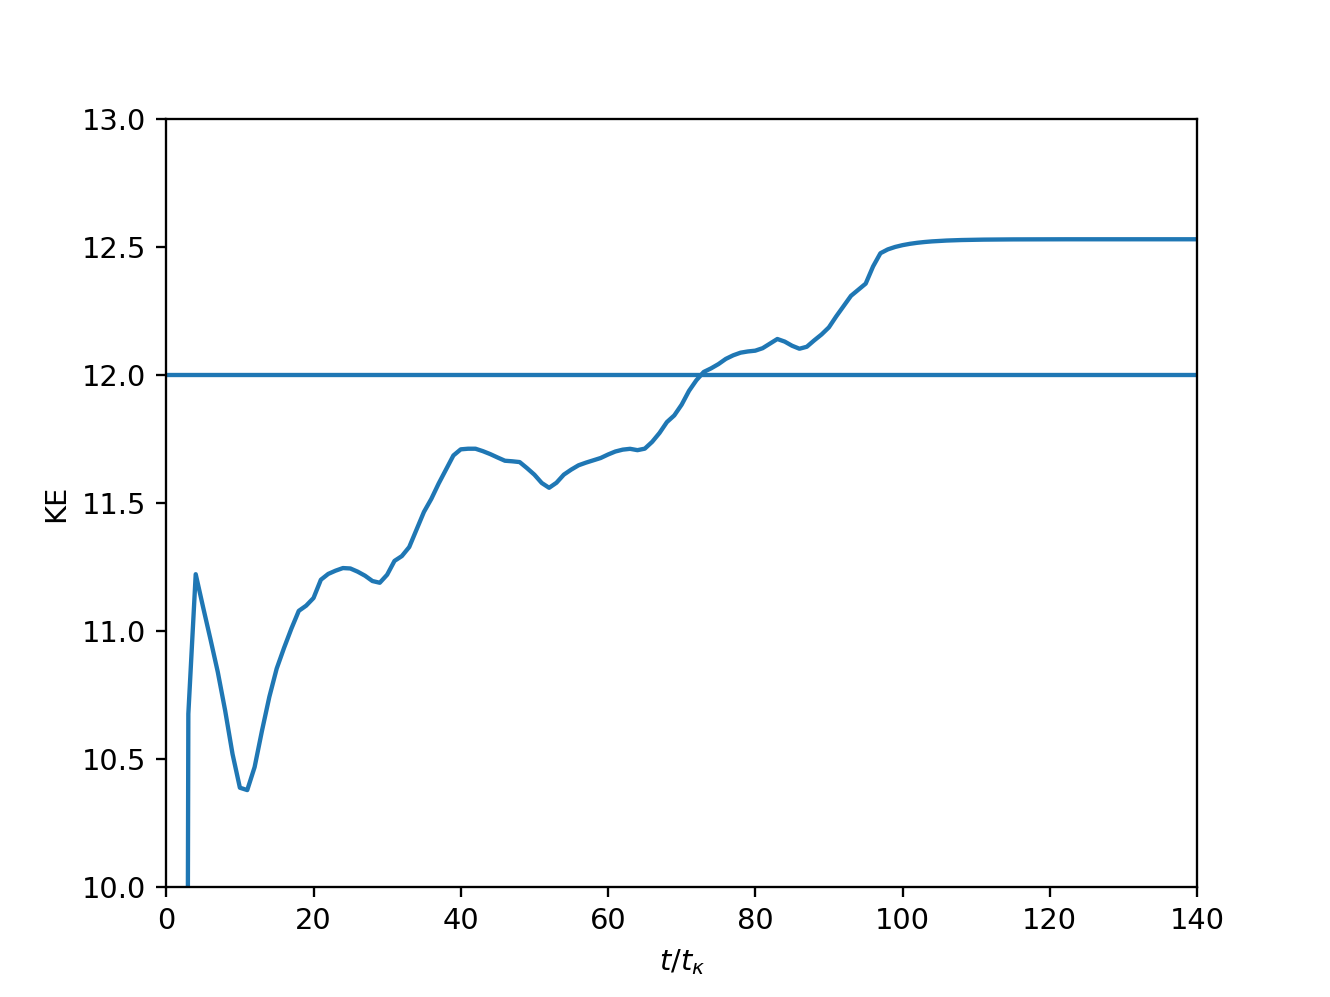

(10.0, 13.0)

In [84]:
plt.figure()
#plt.plot(t1,KE1, color='k')
#plt.plot(t,KE, color='k')
#plt.plot(t2,KE2, color='k')
plt.plot(curtis[:,0], curtis[:,1], label='Curtis')
#plt.plot(t,cum_mean(KE))
#plt.plot(t_e8,KE_e8)
#plt.axhline(21)
#plt.axhline(22)
#plt.axhline(KE_curtis, color='k', alpha=0.4)
plt.axhline(12)
plt.xlabel(r'$t/t_{\kappa}$',)
plt.ylabel('KE')
plt.xlim(0,140)
plt.ylim(10,13)

In [88]:
curtis[curtis[:,0] <= 120,1][-1]/curtis[-1,1]

0.999985077074516

In [89]:
KE_curtis

23.570921

In [48]:
df['tasks'].keys()

<KeysViewHDF5 ['b integral x4', 'b midplane', 'p midplane', 'u midplane', 'v midplane', 'w midplane']>

In [64]:
df['tasks'].keys()

<KeysViewHDF5 ['b', 'bz', 'p', 'u', 'uz', 'v', 'vz', 'w', 'wz']>

<IPython.core.display.Javascript object>


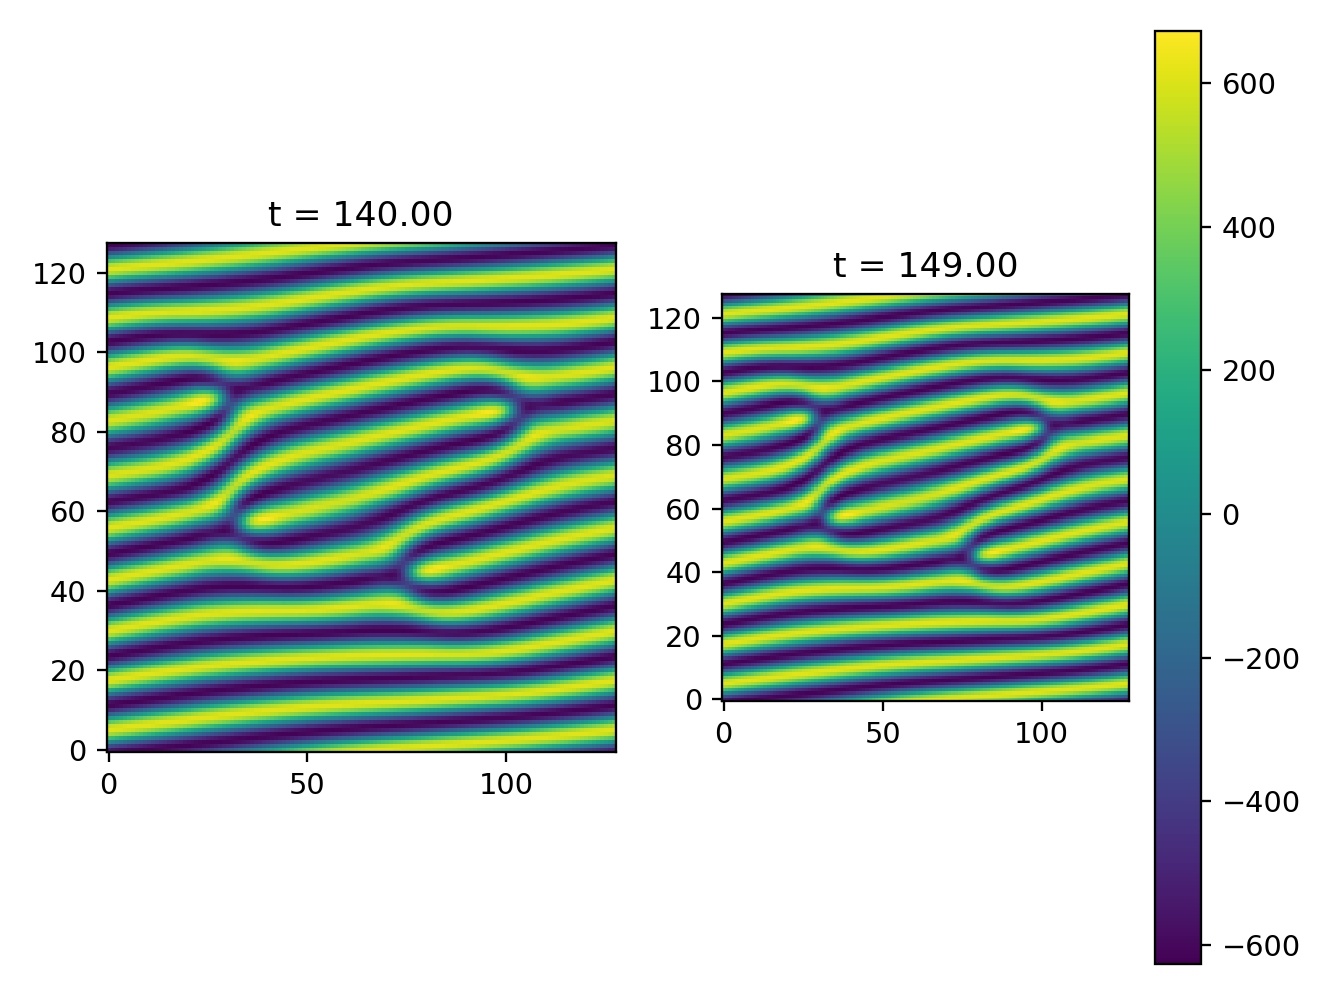

In [80]:
ind = 0
plt.figure()
plt.subplot(121)
plt.imshow(df['tasks/b midplane'][ind,:,:,0], origin='lower')
plt.title(f"t = {df['scales/sim_time'][ind]:5.2f}")
plt.subplot(122)
plt.imshow(df['tasks/b midplane'][-1,:,:,0], origin='lower')
plt.title(f"t = {df['scales/sim_time'][-1]:5.2f}")
plt.colorbar()
plt.tight_layout()

<IPython.core.display.Javascript object>


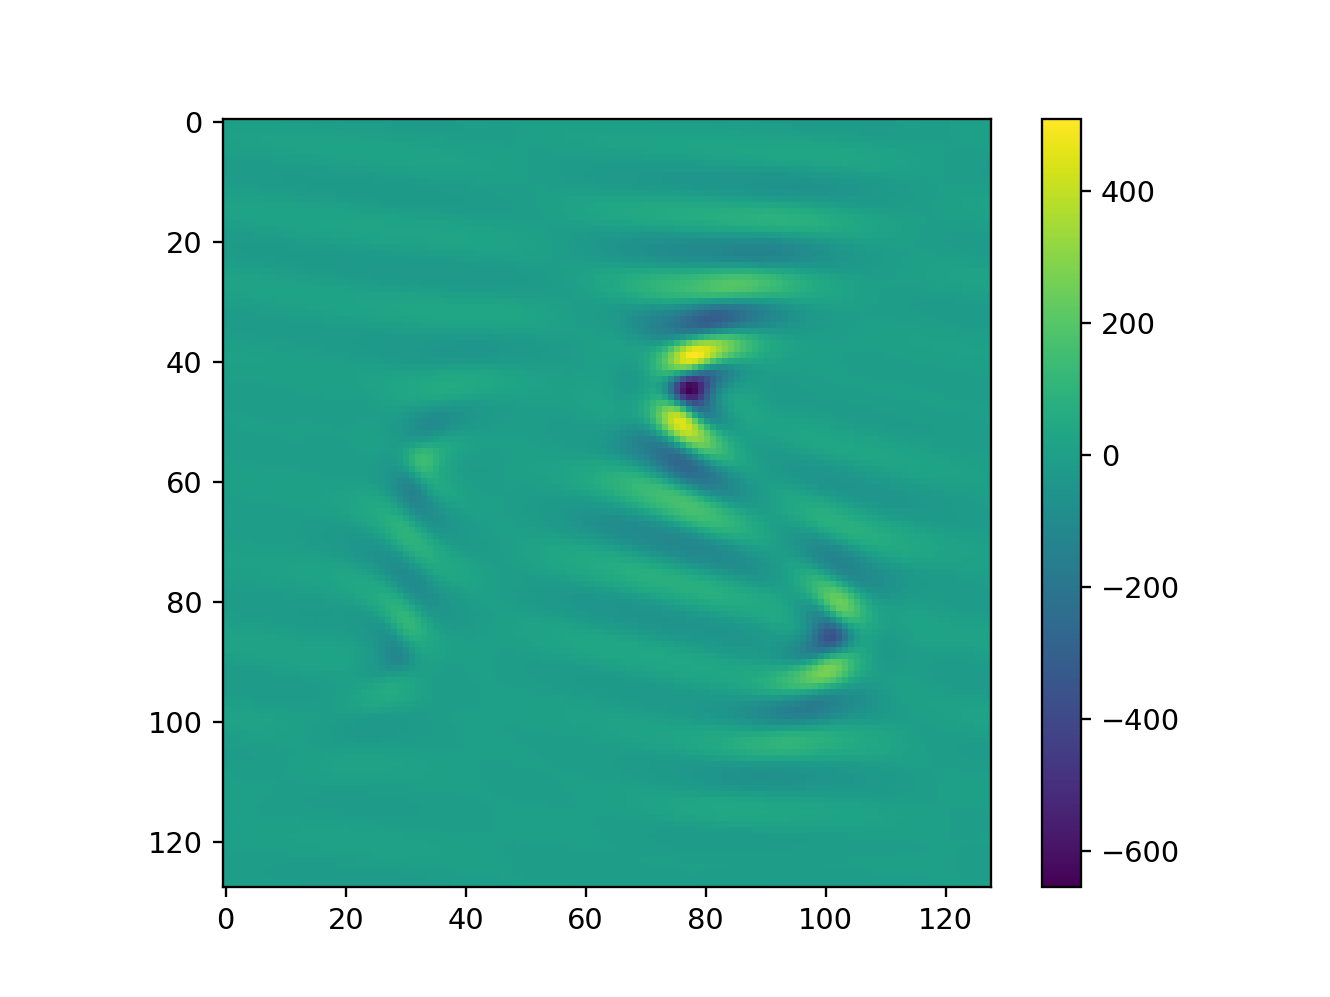

In [82]:
plt.figure()
plt.imshow(df['tasks/b midplane'][-1,:,:,0]-df['tasks/b midplane'][0,:,:,0])
plt.colorbar()


In [57]:
vhat = np.fft.rfftn(df['tasks/v midplane'][-1,:,:,0])
v_pow = (vhat*vhat.conj()).real

<IPython.core.display.Javascript object>


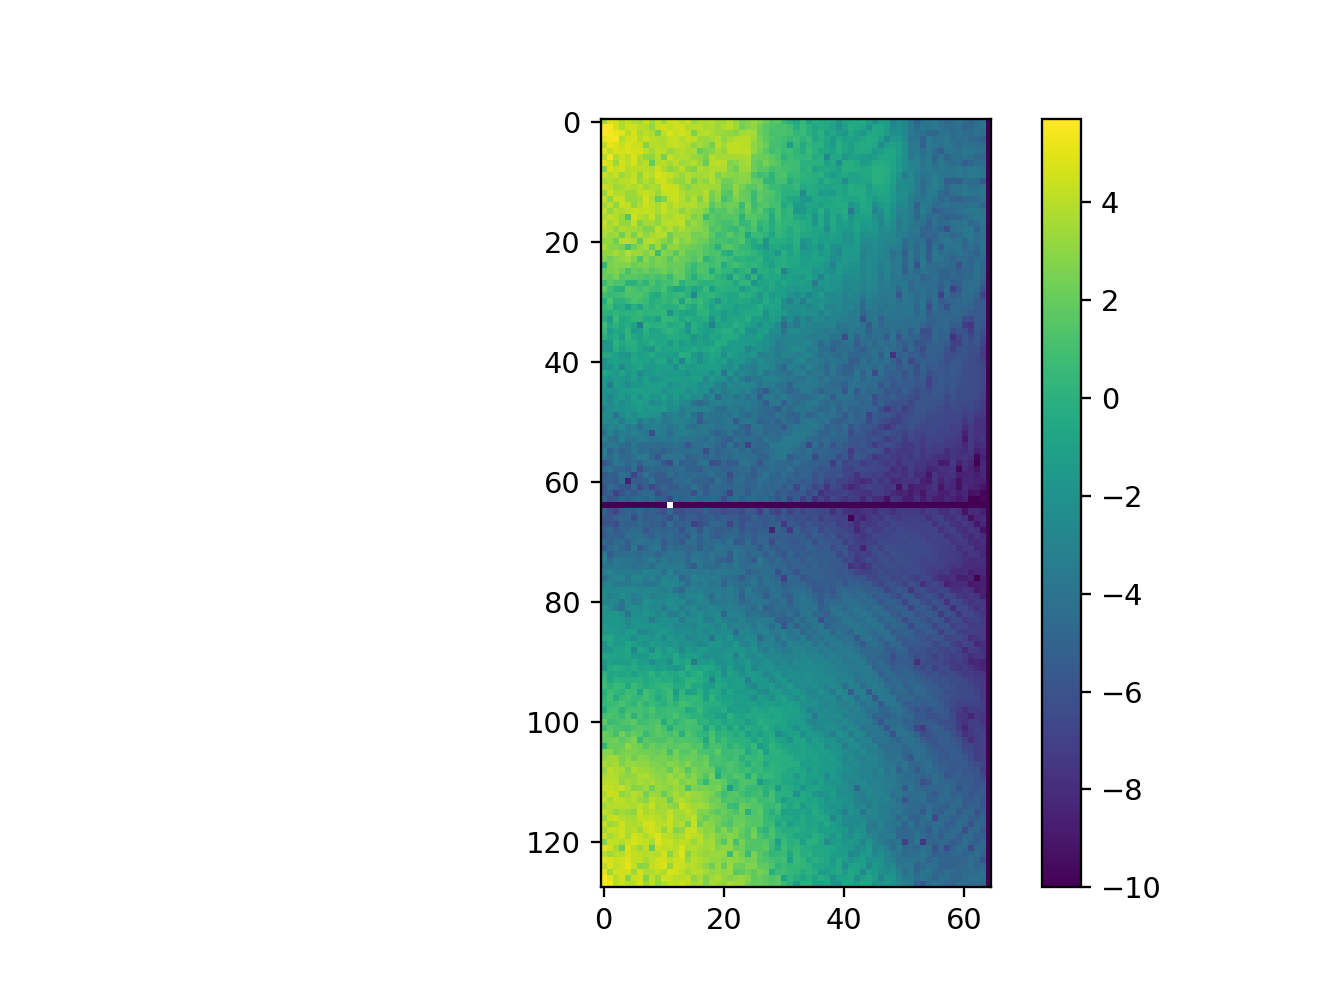

/tmp/ipykernel_7079/642564282.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(v_pow),vmin=-10)


In [60]:
plt.figure()
plt.imshow(np.log10(v_pow),vmin=-10)
plt.colorbar()


<IPython.core.display.Javascript object>


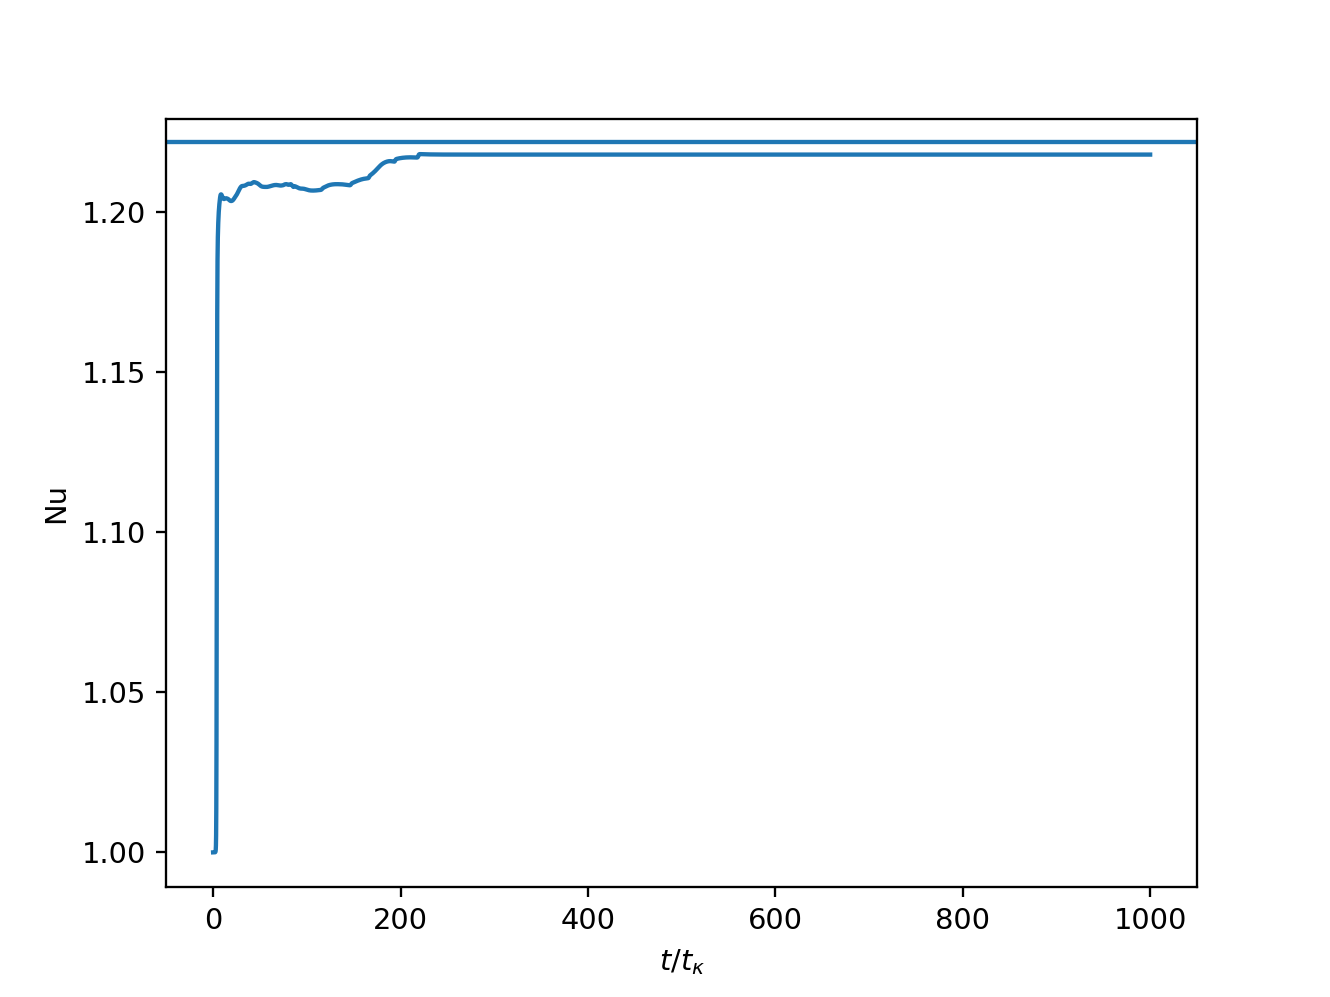

Text(0, 0.5, 'Nu')

In [223]:
plt.figure()
plt.plot(t,Nu)
plt.axhline(Nu_curtis)
plt.xlabel(r'$t/t_{\kappa}$')
plt.ylabel('Nu')

In [232]:
df['scales/sim_time'][:]

array([190.00511458])

In [233]:
T = df['tasks/T'][:]
u = df['tasks/u'][:]
v = df['tasks/v'][:]
w = df['tasks/w'][:]
df.close()

In [234]:
KE = 0.5*(u*u +v*v + w*w)
print(KE.mean())

4.4243654744525225


<IPython.core.display.Javascript object>


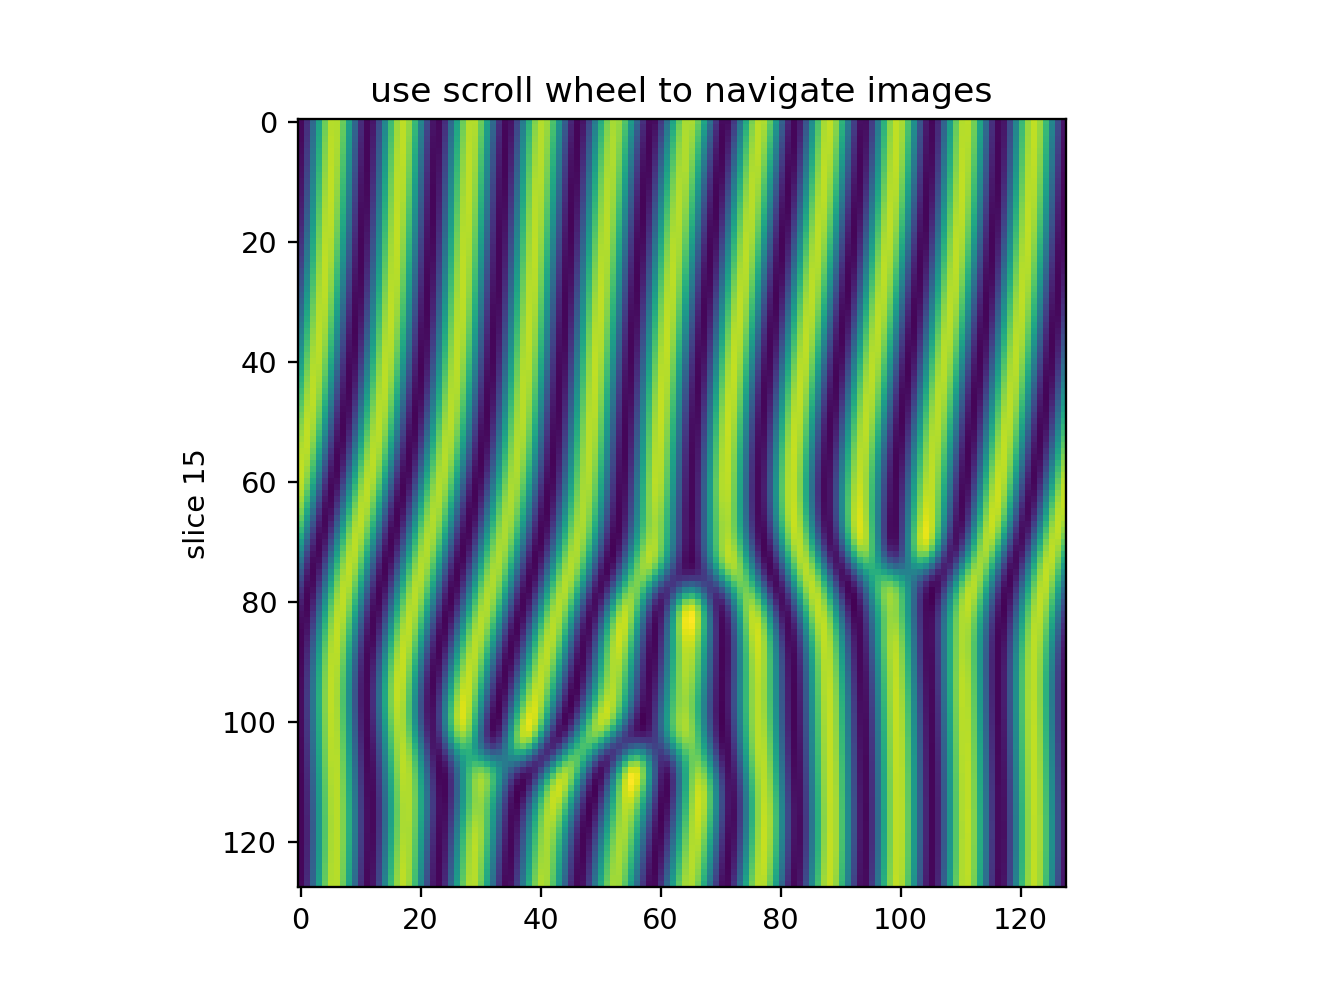

In [236]:
fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, T[0,:,:,:],slice_axis=-1)
fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()